# This notebook demonstrates how to propagate errors in Cpx-Liquid thermobarometry
- This builds on from the notebook showing how to consider error in a single phase (Liquid_Thermometry_error_prop.ipynb). We suggest you look at that first, as its simpler when you don't have to worry about two separate phases
- We use the experimental data of Feig et al. (2010) - DOI 10.1007/s00410-010-0493-3, and the author-stated 1 sigma errors

#### You need to install Thermobar once on your machine, if you haven't done this yet, uncomment the line below (remove the #)

In [ ]:
#!pip install Thermobar

In [1]:
# Import other python stuff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt
import sympy as sym
pd.options.display.max_columns = None

In [2]:
# Importing data

out=pt.import_excel('Cpx_Liq_Error_prop_Feig2010_example.xlsx', sheet_name="Sheet1")
my_input=out['my_input']
myCpxs1=out['Cpxs']
myLiquids1=out['Liqs']

In [3]:
# Importing errors (in  Feig et al. 2010, given as absolute errors for each oxide based on averaging of products within each experiment)

out_err=pt.import_excel_errors('Cpx_Liq_Error_prop_Feig2010_example.xlsx', sheet_name="Sheet1")
myLiquids1_err=out_err['Liqs_Err']
myCpxs1_err=out_err['Cpxs_Err']
myinput_Out=out_err['my_input_Err']

# Example 1: Uncertainty in a single input parameter
- Here, we consider the effect of adding just 5% noise to measured Na2O contents of Cpx (a fairly typical uncertainty resulting from EPMA analyses)
- Because our liquids and cpx dataframes need to be the same size to feed into the calculate_Cpx_Liq functions, we also use the add_noise_sample_1phase to generate a dataframe of Liq compositions, however, we simply state noise_percent=0 so all the rows for each liquid are identical

In [4]:
Liquids_only_noNoise=pt.add_noise_sample_1phase(phase_comp=myLiquids1, 
                        noise_percent=0, duplicates=1000, err_dist="normal")


All negative numbers replaced with zeros. If you wish to keep these, set positive=False


In [5]:
Cpx_5Na2O=pt.add_noise_sample_1phase(phase_comp=myCpxs1, variable="Na2O", 
          variable_err=5, variable_err_type="Perc", duplicates=1000, 
          err_dist="normal")

Cpx_5Na2O.head()

All negative numbers replaced with zeros. If you wish to keep these, set positive=False


,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx,Sample_ID_Cpx_Num
0,51.075956,0.325086,4.892502,5.714957,0.1657,16.897042,20.466034,0.315182,0.0,0.252186,0.0,0.0
1,51.075956,0.325086,4.892502,5.714957,0.1657,16.897042,20.466034,0.336212,0.0,0.252186,0.0,0.0
2,51.075956,0.325086,4.892502,5.714957,0.1657,16.897042,20.466034,0.307745,0.0,0.252186,0.0,0.0
3,51.075956,0.325086,4.892502,5.714957,0.1657,16.897042,20.466034,0.348900,0.0,0.252186,0.0,0.0
4,51.075956,0.325086,4.892502,5.714957,0.1657,16.897042,20.466034,0.331318,0.0,0.252186,0.0,0.0


## Now we input these two new dataframes into the function for calculating P and T iteratively using two equations
- here, T=equation 33 from Putirka 2008, P=Equation 31 from Putirka 2008

In [6]:
Out_5_noise_cpx=pt.calculate_cpx_liq_press_temp(liq_comps=Liquids_only_noNoise, cpx_comps=Cpx_5Na2O, 
                                    equationP="P_Put2008_eq31", equationT="T_Put2008_eq33", eq_tests=True)

Using Fe3FeT from input file to calculate Kd Fe-Mg


## Each histogram shows the pressure distribution from a single Cpx-Liquid pair resulting from adding 5% error. 
- Here we use the loc function to find all the rows where Cpx_Num==0, e.g. this is the first liquid in your excel spreadsheet.
- If you wanted the 6th liquid instead, change ==0 to ==5 (as python starts its numbering from 0)

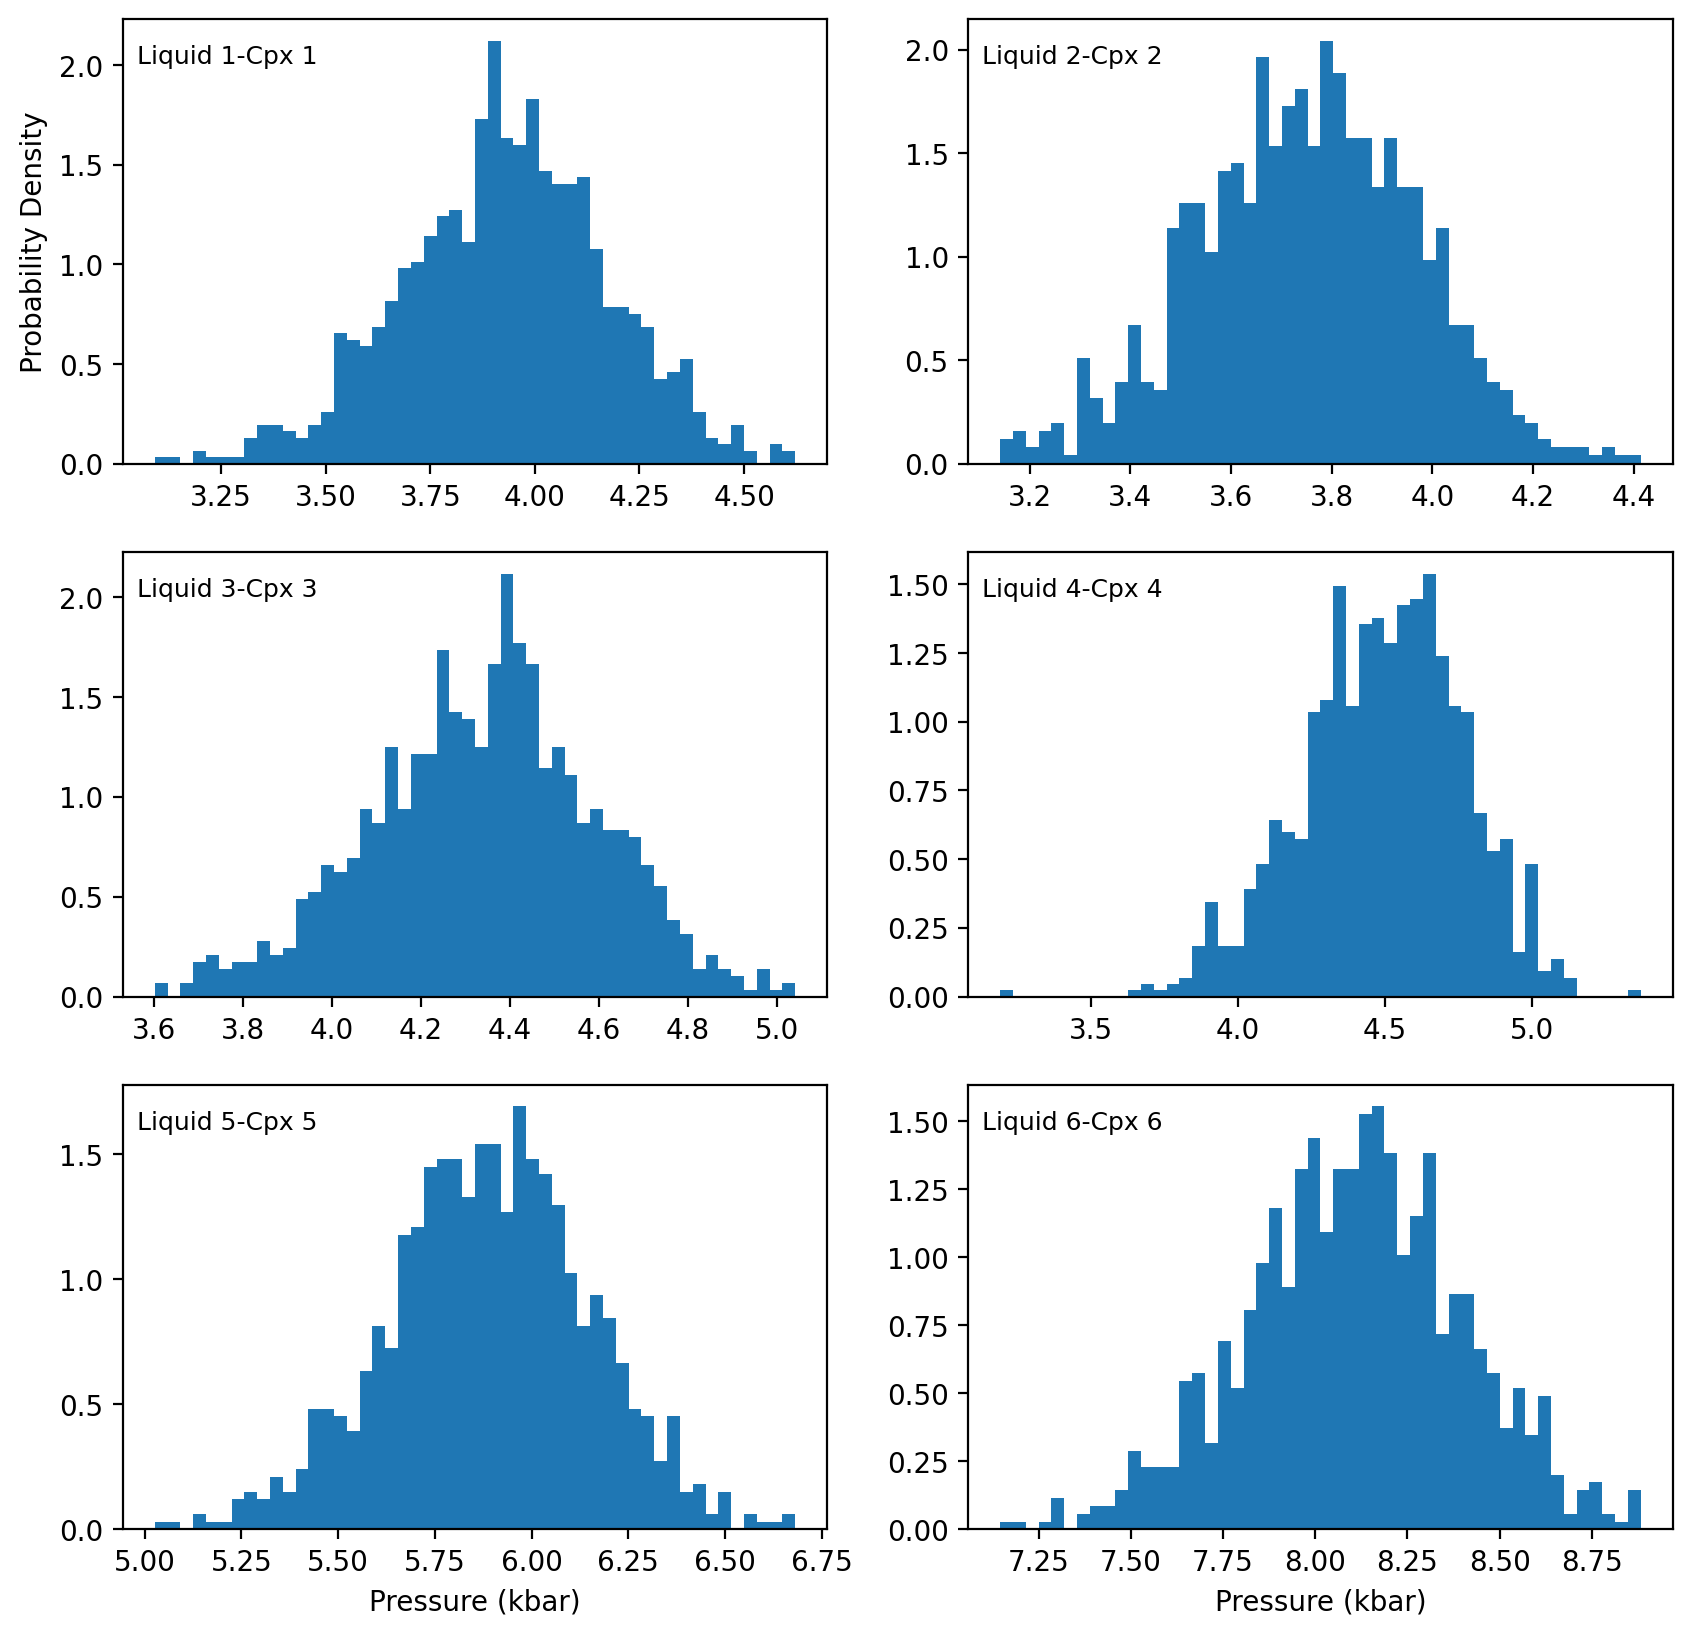

In [19]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 10))

ax1.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==0, "P_kbar_calc"], bins=50, density = True)
ax1.annotate("Liquid 1-Cpx 1", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax2.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==1, "P_kbar_calc"], bins=50, density = True)
ax2.annotate("Liquid 2-Cpx 2", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax3.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==2, "P_kbar_calc"], bins=50, density = True)
ax3.annotate("Liquid 3-Cpx 3", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax4.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==3, "P_kbar_calc"], bins=50, density = True)
ax4.annotate("Liquid 4-Cpx 4", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax5.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==4, "P_kbar_calc"], bins=50, density = True)
ax5.annotate("Liquid 5-Cpx 5", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax6.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==5, "P_kbar_calc"], bins=50, density = True)
ax6.annotate("Liquid 6-Cpx 6", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)

ax6.set_xlabel('Pressure (kbar)')
ax5.set_xlabel('Pressure (kbar)')
ax1.set_ylabel('Probability Density')
plt.rcParams['figure.dpi']= 300

# Smaller plot used in the manuscript
- Here we plot just the pressure distribution from Liq1 and Cpx1

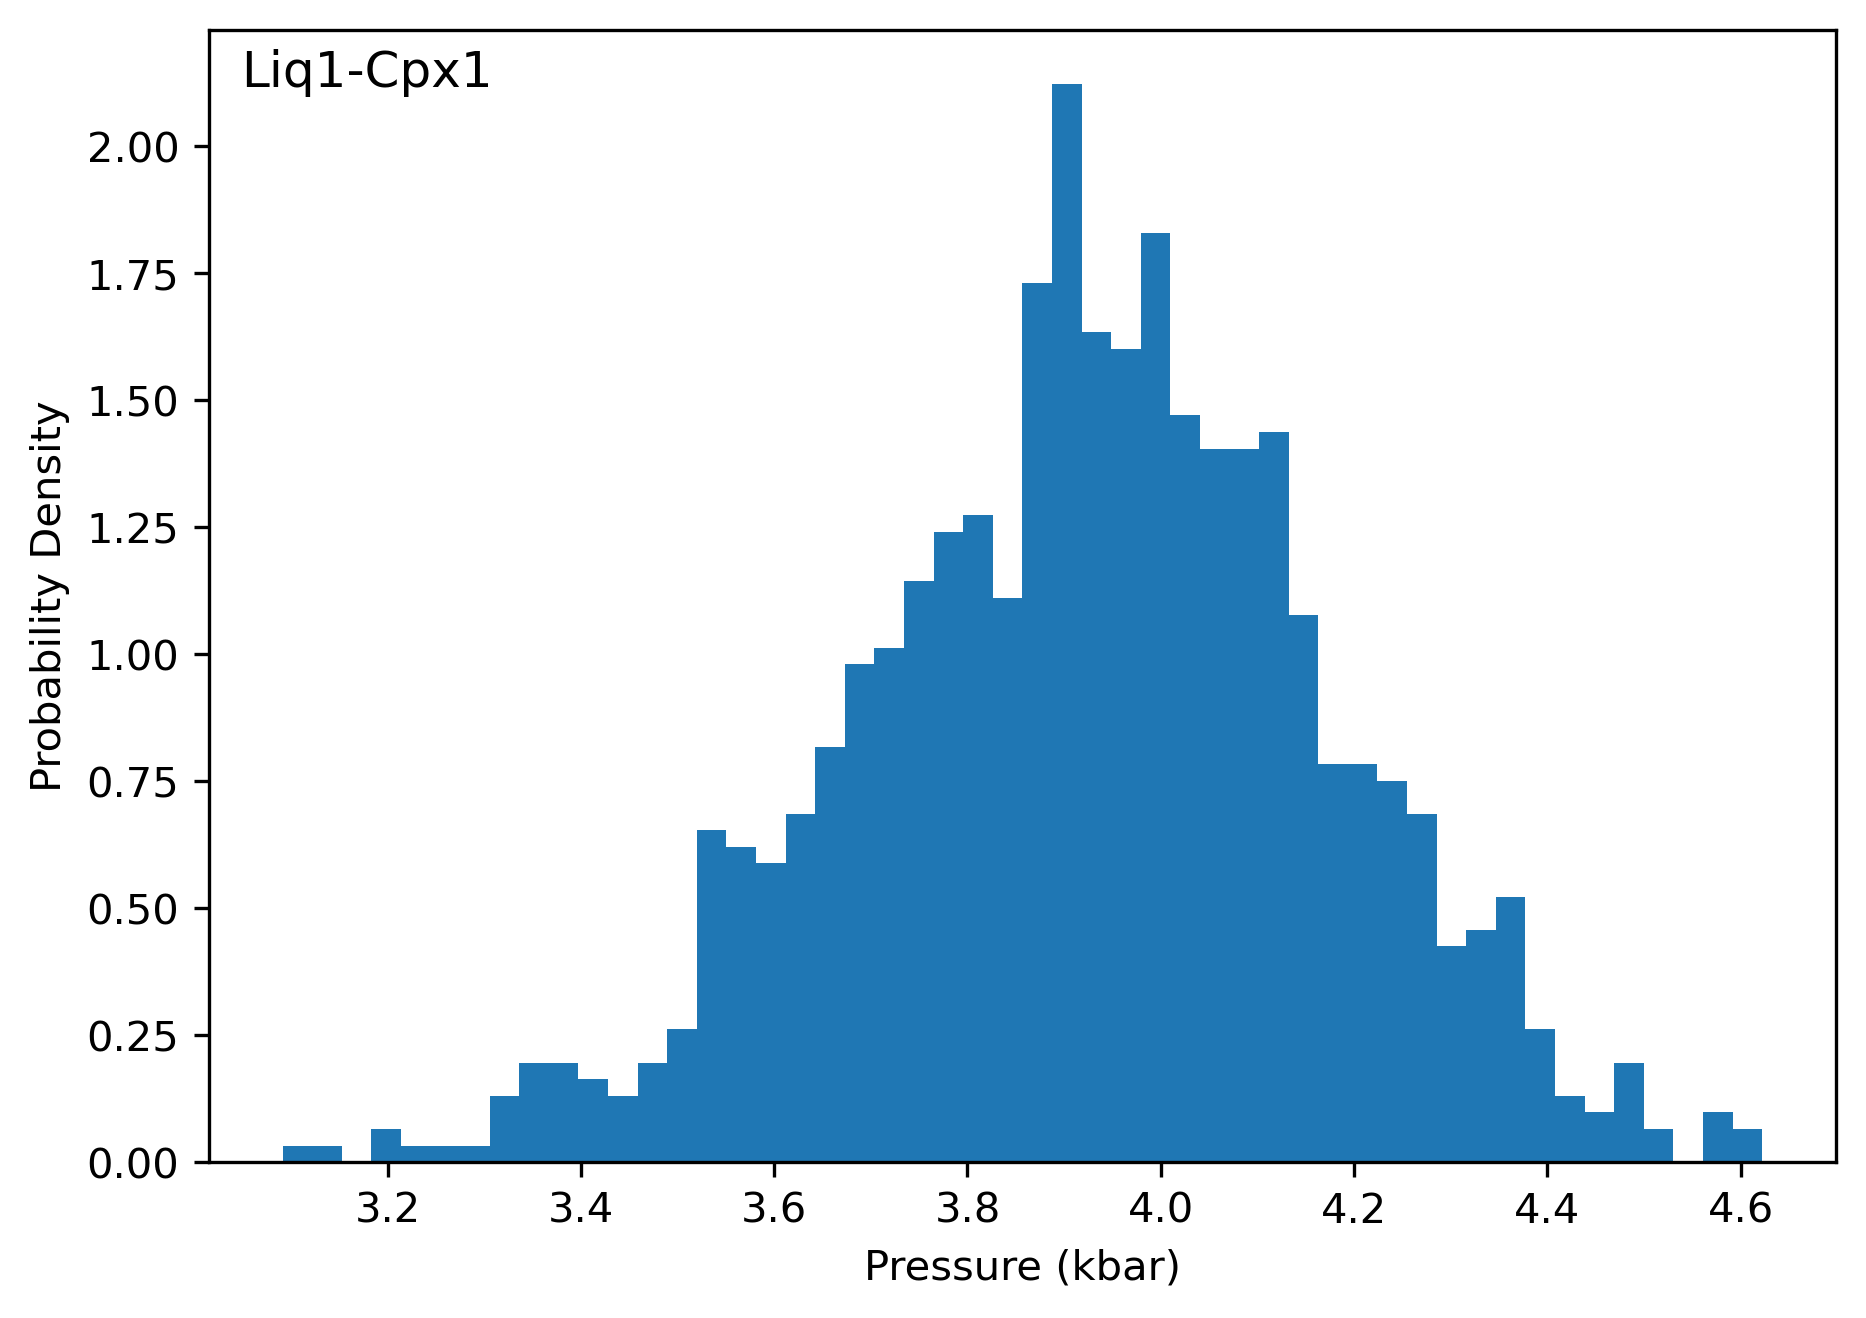

In [21]:
fig, ((ax1)) = plt.subplots(1, 1, figsize=(7, 5))
ax1.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==0, 
                             "P_kbar_calc"], bins=50, density = True)
ax1.annotate("Liq1-Cpx1", xy=(0.02, 0.95), xycoords="axes fraction",
             fontsize=12)
ax1.set_xlabel('Pressure (kbar)')
ax1.set_ylabel('Probability Density')
fig.savefig('5%error_cpx.png', dpi=300)


## We can plot the same diagram but for temperatures

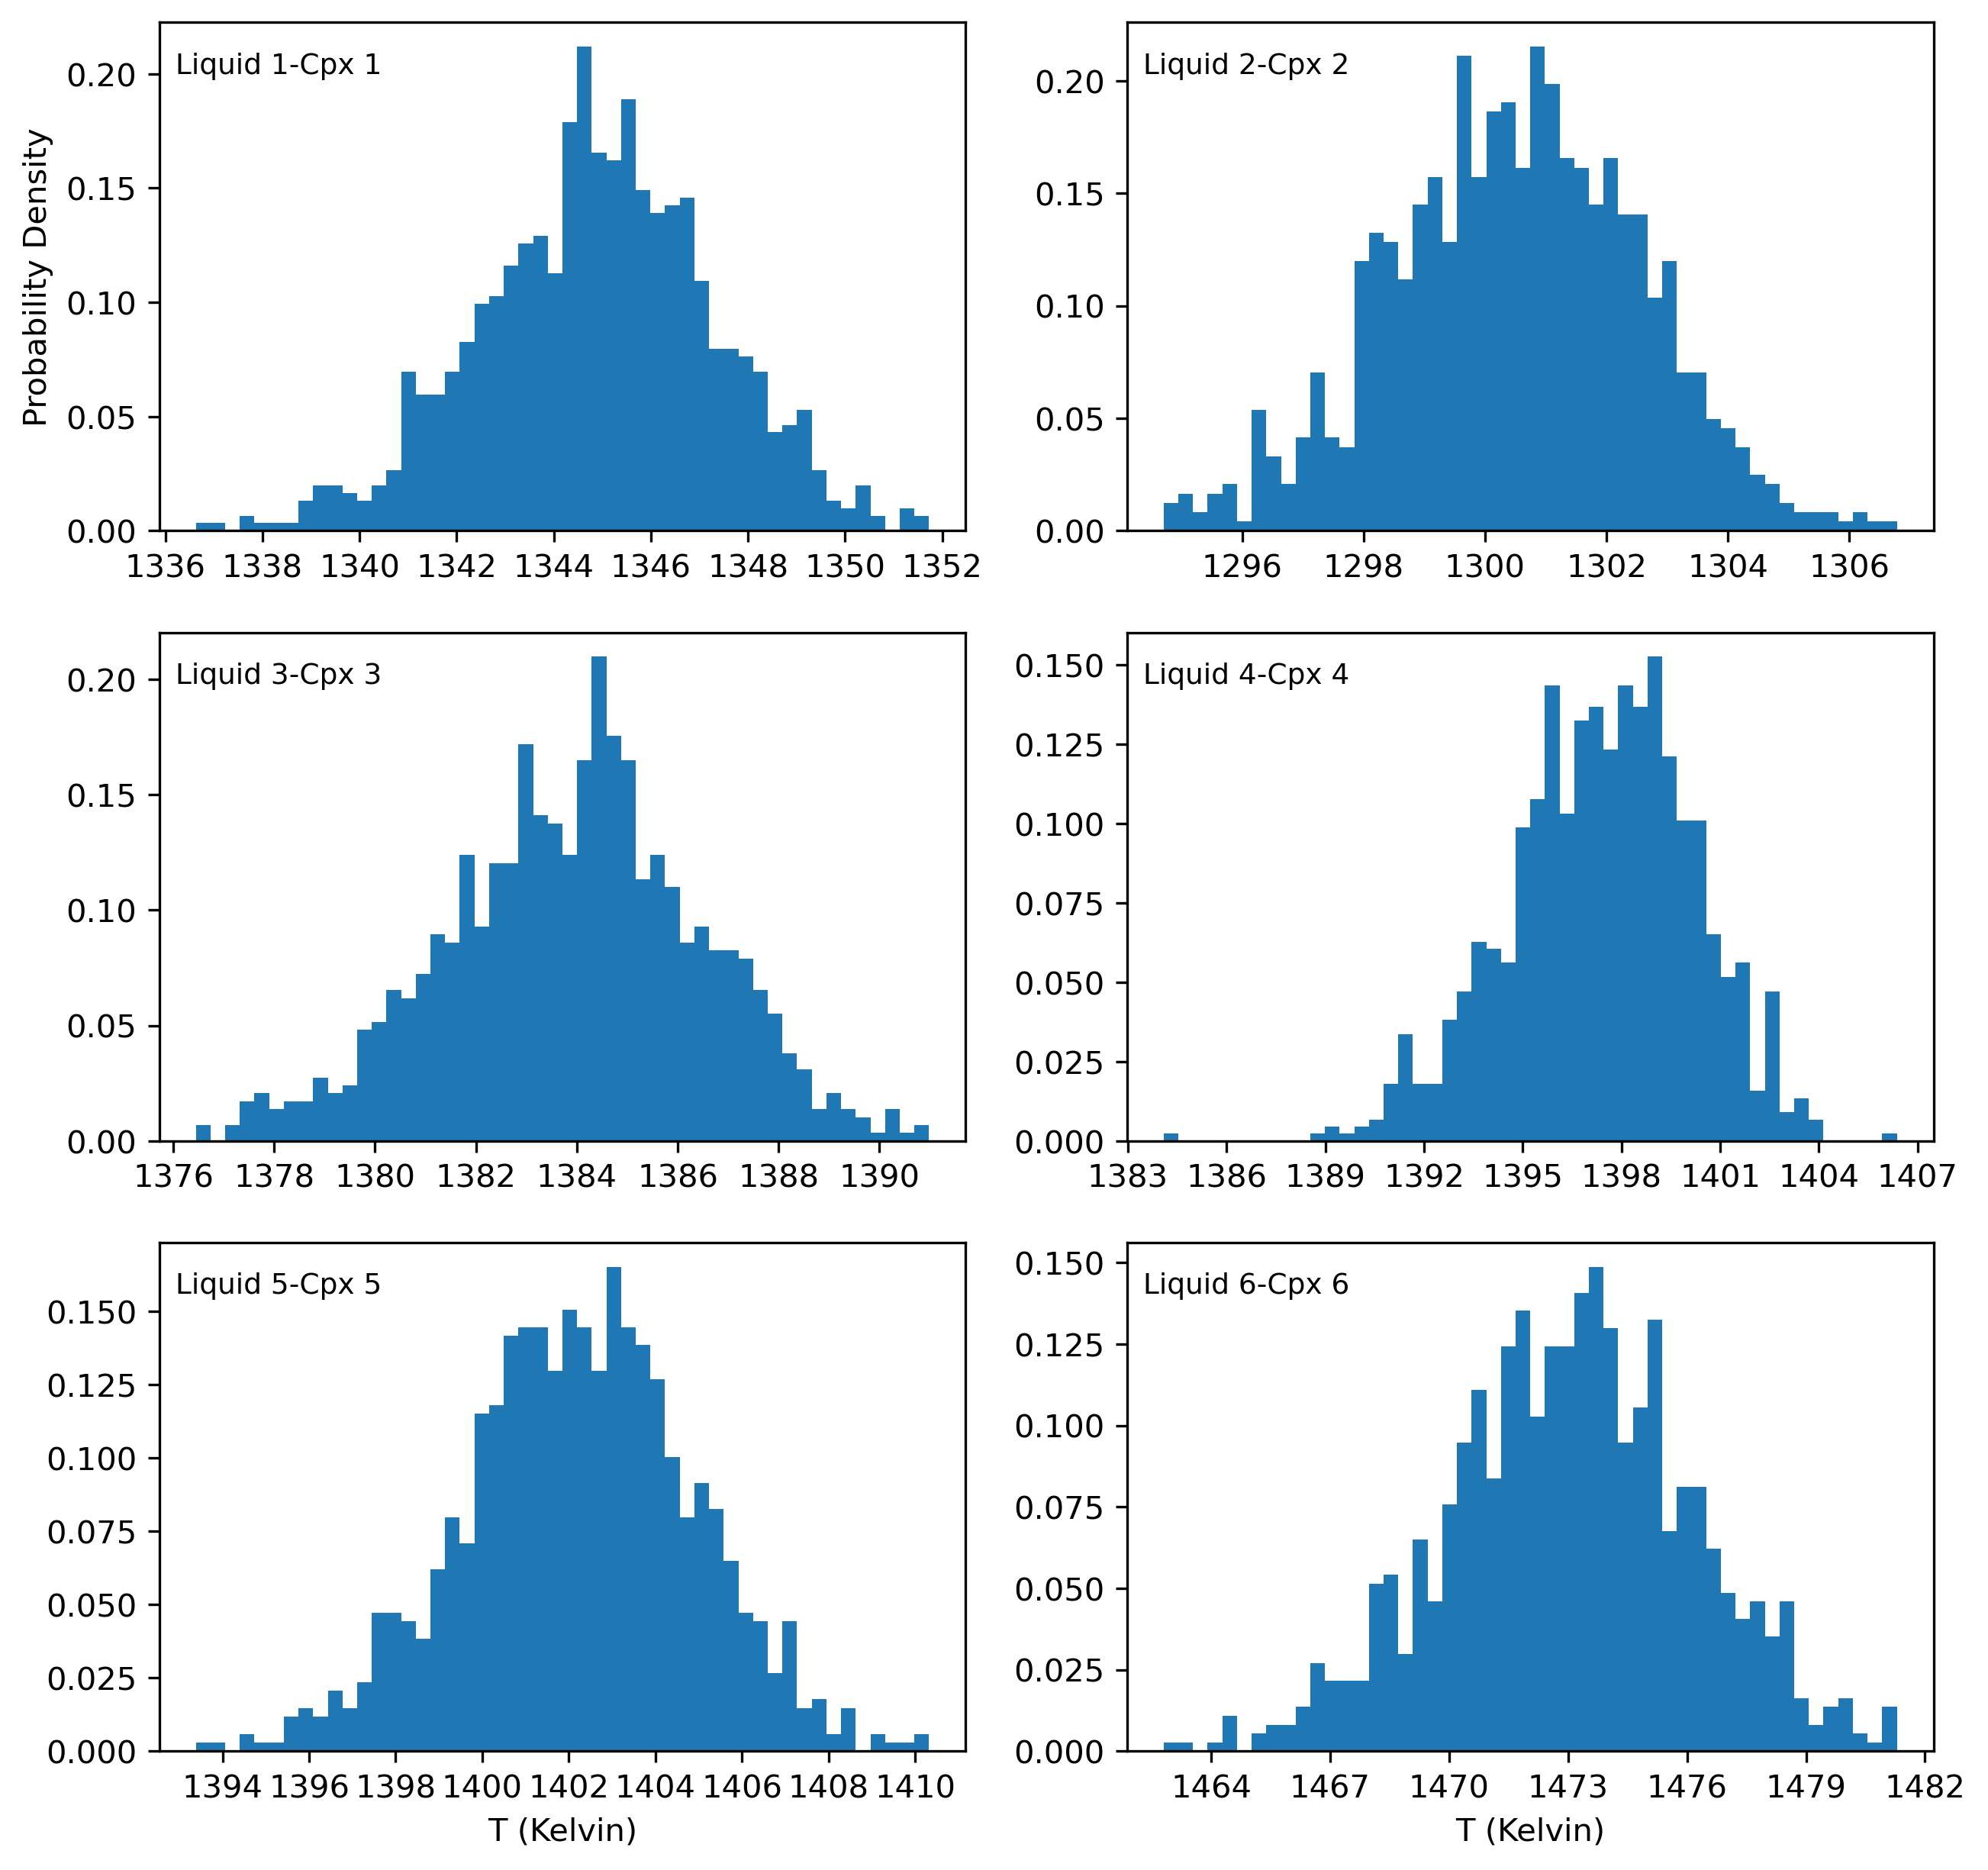

In [22]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 10))

ax1.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==0, "T_K_calc"], bins=50, density = True)
ax1.annotate("Liquid 1-Cpx 1", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax2.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==1, "T_K_calc"], bins=50, density = True)
ax2.annotate("Liquid 2-Cpx 2", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax3.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==2, "T_K_calc"], bins=50, density = True)
ax3.annotate("Liquid 3-Cpx 3", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax4.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==3, "T_K_calc"], bins=50, density = True)
ax4.annotate("Liquid 4-Cpx 4", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax5.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==4, "T_K_calc"], bins=50, density = True)
ax5.annotate("Liquid 5-Cpx 5", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax6.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==5, "T_K_calc"], bins=50, density = True)
ax6.annotate("Liquid 6-Cpx 6", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)

ax5.set_xlabel('T (Kelvin)')
ax6.set_xlabel('T (Kelvin)')
ax1.set_ylabel('Probability Density')
plt.rcParams['figure.dpi']= 200
from pylab import MaxNLocator
ax1.xaxis.set_major_locator(MaxNLocator(integer = True))
ax2.xaxis.set_major_locator(MaxNLocator(integer = True))
ax3.xaxis.set_major_locator(MaxNLocator(integer = True))
ax4.xaxis.set_major_locator(MaxNLocator(integer = True))
ax5.xaxis.set_major_locator(MaxNLocator(integer = True))
ax6.xaxis.set_major_locator(MaxNLocator(integer = True))

### We can use the function Av_Noise_Samples to calculate the mean, median, max, min and standard deviation 
- The first input is the thing you want to average (e.g. the calculated temperature in this instance), the second input is the thing you want to do the averaging based on (e.g. here average all rows with the same value of "Sample_ID_Liq_Num"

In [23]:
Stats_T_K=pt.av_noise_samples_series(Out_5_noise_cpx['T_K_calc'], Out_5_noise_cpx['Sample_ID_Liq_Num'])
Stats_T_K

,Sample,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,0.0,1344.894258,1344.922128,2.419770,1351.726965,1336.629390
1,1.0,1300.495604,1300.541222,2.074426,1306.784148,1294.706610
2,2.0,1383.921678,1384.084991,2.554312,1390.981446,1376.446964
3,3.0,1397.394700,1397.518159,2.803281,1406.368122,1384.088760
4,4.0,1402.219460,1402.254429,2.669570,1410.323626,1393.382573
5,5.0,1473.013525,1473.079885,3.109855,1481.290132,1462.803477
6,6.0,1480.674951,1480.752742,3.202559,1491.533113,1469.828880


In [24]:
Stats_P_kbar=pt.av_noise_samples_series(Out_5_noise_cpx['P_kbar_calc'], Out_5_noise_cpx['Sample_ID_Liq_Num'])
Stats_P_kbar

,Sample,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,0.0,3.929457,3.932292,0.245311,4.622112,3.091424
1,1.0,3.751278,3.756054,0.218498,4.413945,3.141685
2,2.0,4.341625,4.357803,0.252970,5.040813,3.601288
3,3.0,4.493359,4.505439,0.273824,5.369743,3.192957
4,4.0,5.889269,5.892680,0.260846,6.681249,5.025794
5,5.0,8.104480,8.110678,0.292225,8.882506,7.145309
6,6.0,6.208298,6.215491,0.291536,7.195604,5.219755


# Example 2 - published absolute 1 sigma values for all oxides
- Here, we use the 1 sigma values for each oxide in both the glass and cpx reported by Feig et al. 2010
- We make a noisy dataframe of the same length for liquids and cpxs, then combine them into the function for iterating P and T

In [25]:
Liquids_st_noise=pt.add_noise_sample_1phase(phase_comp=myLiquids1, phase_err=myLiquids1_err,
                                             phase_err_type="Abs", duplicates=1000, err_dist="normal")

Cpxs_st_noise=pt.add_noise_sample_1phase(phase_comp=myCpxs1, phase_err=myCpxs1_err,
                                             phase_err_type="Abs", duplicates=1000, err_dist="normal")


All negative numbers replaced with zeros. If you wish to keep these, set positive=False
All negative numbers replaced with zeros. If you wish to keep these, set positive=False


In [26]:
Out_st_noise=pt.calculate_cpx_liq_press_temp(liq_comps=Liquids_st_noise, cpx_comps=Cpxs_st_noise, 
                                    equationP="P_Put2008_eq31", 
                                             equationT="T_Put2008_eq33", eq_tests=True)


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Using Fe3FeT from input file to calculate Kd Fe-Mg


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [27]:
Stats_T_K=pt.av_noise_samples_series(Out_st_noise['T_K_calc'], Liquids_st_noise['Sample_ID_Liq_Num'])
Stats_T_K

,Sample,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,0.0,1344.495046,1344.815141,11.475620,1385.706811,1308.726104
1,1.0,1297.526991,1298.573791,15.479943,1332.777806,1156.428427
2,2.0,1380.681666,1383.443231,21.219782,1435.658766,1276.380632
3,3.0,1396.974591,1397.223486,10.063905,1423.636235,1363.634442
4,4.0,1402.292853,1402.973377,11.332019,1438.375755,1360.586203
5,5.0,1472.827299,1472.813003,6.682868,1493.212434,1452.698272
6,6.0,1479.863914,1480.098930,8.599661,1507.497137,1453.254128


In [28]:
Stats_P_kbar=pt.av_noise_samples_series(Out_st_noise['P_kbar_calc'], Liquids_st_noise['Sample_ID_Liq_Num'])
Stats_P_kbar

,Sample,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,0.0,3.900259,3.939957,0.852358,6.750735,0.659271
1,1.0,3.511294,3.702993,1.389847,6.997718,-11.389520
2,2.0,4.081090,4.403036,1.942116,8.932440,-5.442320
3,3.0,4.466304,4.492542,0.831519,6.637589,1.693547
4,4.0,5.882980,5.923800,0.960401,8.911448,1.469215
5,5.0,8.094903,8.110853,0.469161,9.713196,6.628857
6,6.0,6.191723,6.196358,0.466562,7.827220,4.553426


## Example plot shown in manuscript for just 2 cpx-liq pairs from experiments
- Here, on the LHS we plot cpx-liq pairs from the first row of the spreadsheet (ID=0)
- On the RHS, we plot the pairs from row 4 (ID=3)

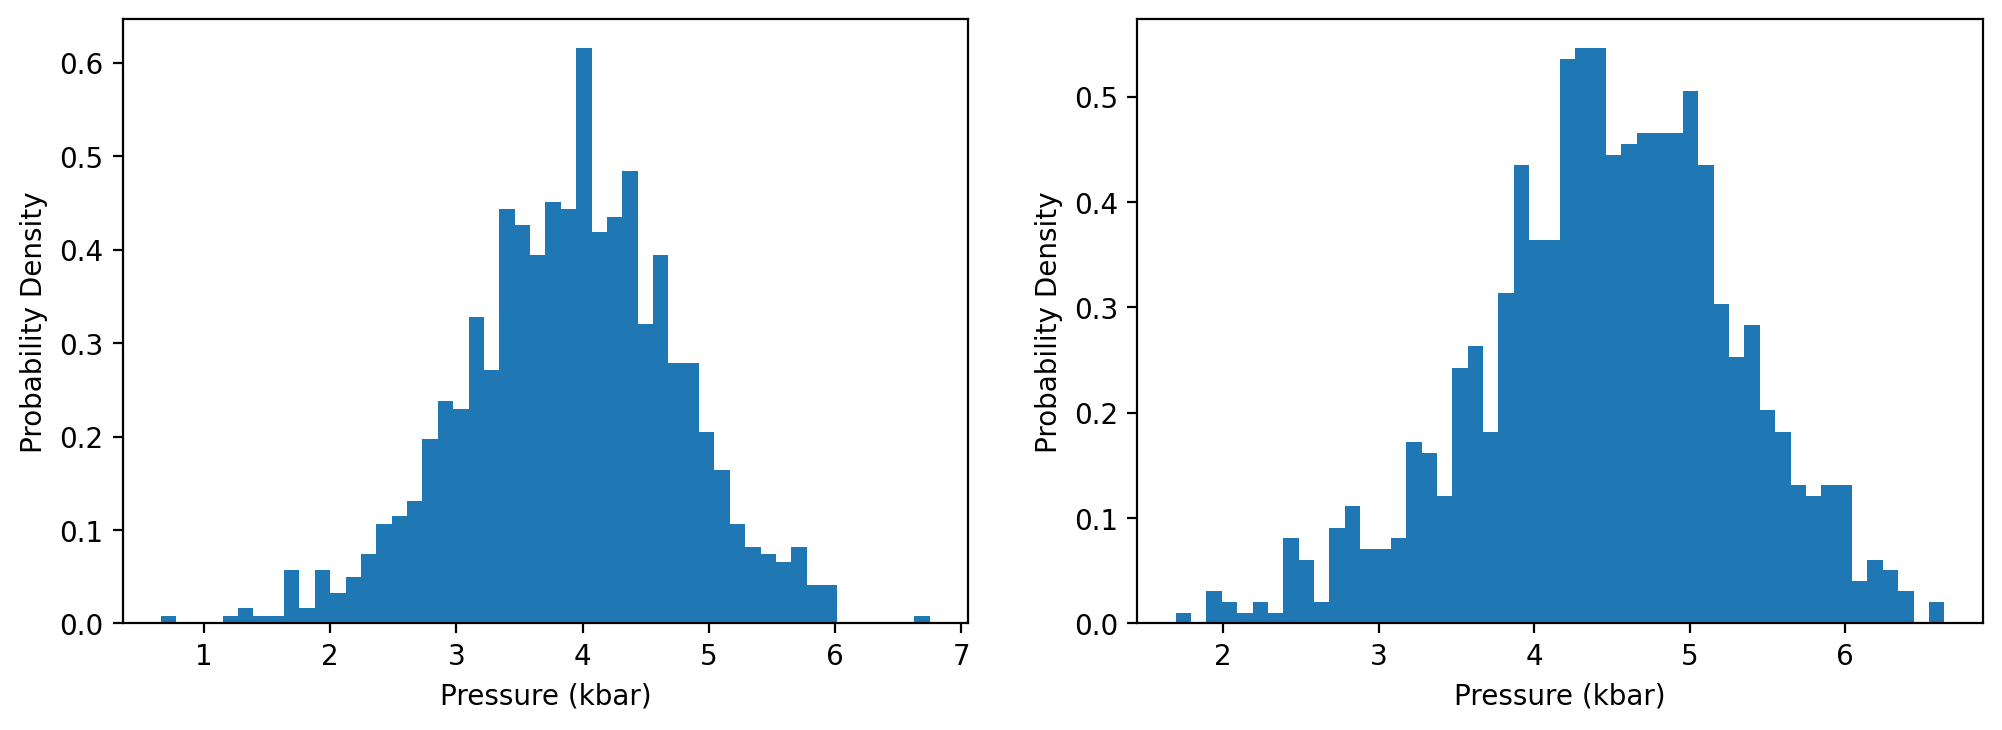

In [29]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 4))

ax1.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Liq_Num']==0, "P_kbar_calc"], bins=50, density = True)
ax2.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Liq_Num']==3, "P_kbar_calc"], bins=50, density = True)
#ax2.set_xlim([0, 6])
ax1.set_xlabel('Pressure (kbar)')
ax2.set_xlabel('Pressure (kbar)')
ax1.set_ylabel('Probability Density')
ax2.set_ylabel('Probability Density')
fig.savefig('Manuscript_2CpxNoises.png', dpi=300, transparent=True)

# Same plot but for 6 separate cpx-liq pairs
- can average by _Cpx or _Liq, doesnt matter, as will match

Text(0, 0.5, 'Probability Density')

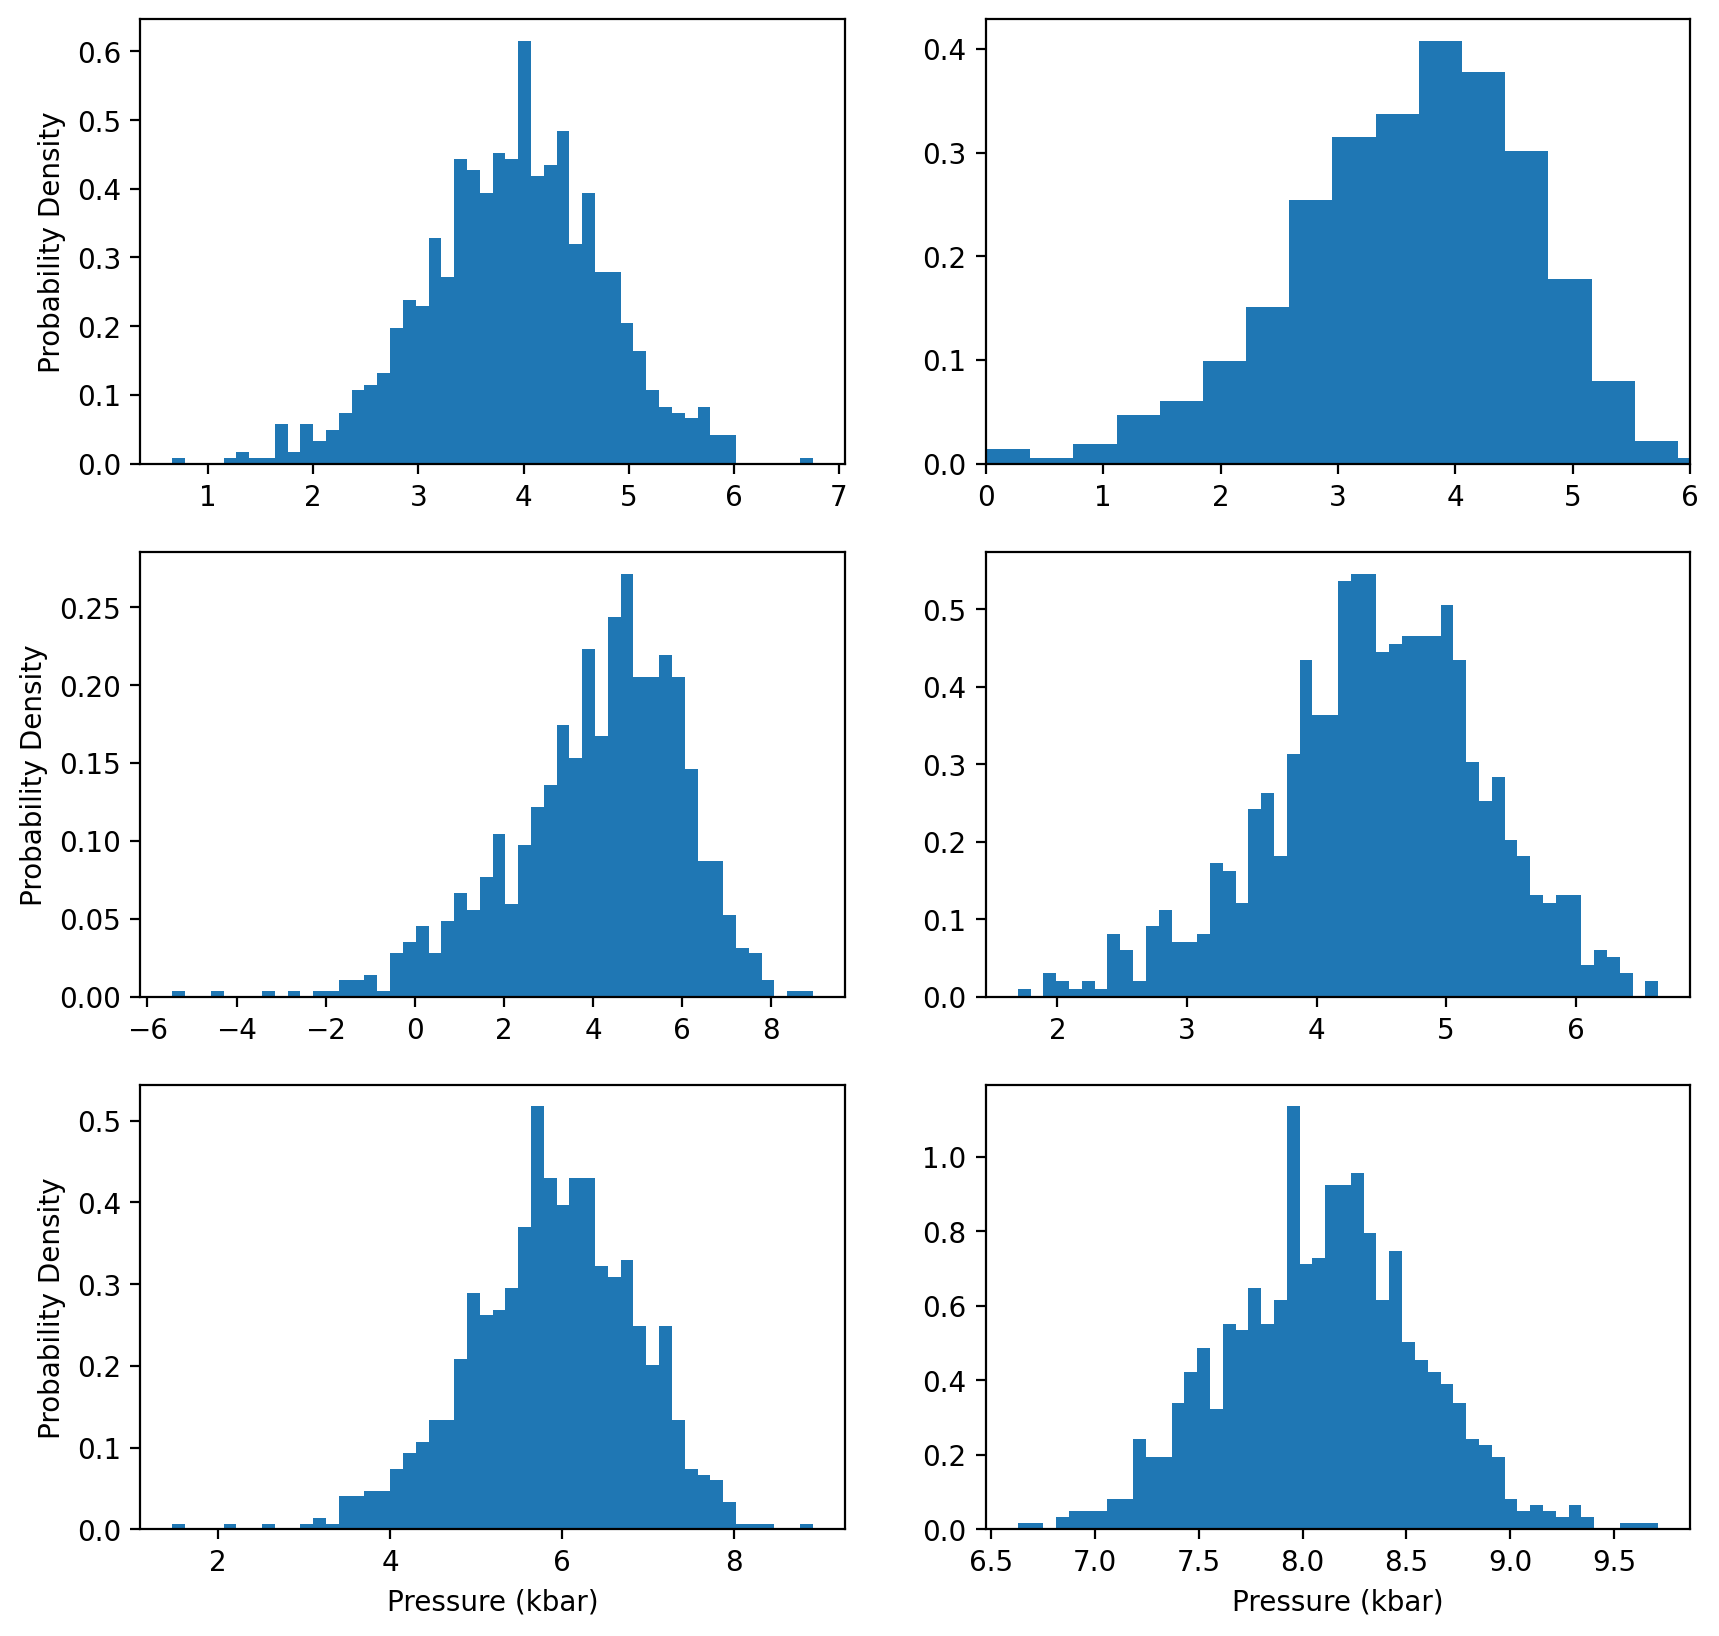

In [30]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 10))

ax1.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==0, "P_kbar_calc"], bins=50, density = True)
ax2.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==1, "P_kbar_calc"], bins=50, density = True)
ax3.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==2, "P_kbar_calc"], bins=50, density = True)
ax4.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==3, "P_kbar_calc"], bins=50, density = True)
ax5.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==4, "P_kbar_calc"], bins=50, density = True)
ax6.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==5, "P_kbar_calc"], bins=50, density = True)
ax2.set_xlim([0, 6])
ax6.set_xlabel('Pressure (kbar)')
ax5.set_xlabel('Pressure (kbar)')
ax1.set_ylabel('Probability Density')
ax3.set_ylabel('Probability Density')
ax5.set_ylabel('Probability Density')

## Similar plot, but showing temperature distributions for first 6 pairs

Text(0, 0.5, 'Probability Density')

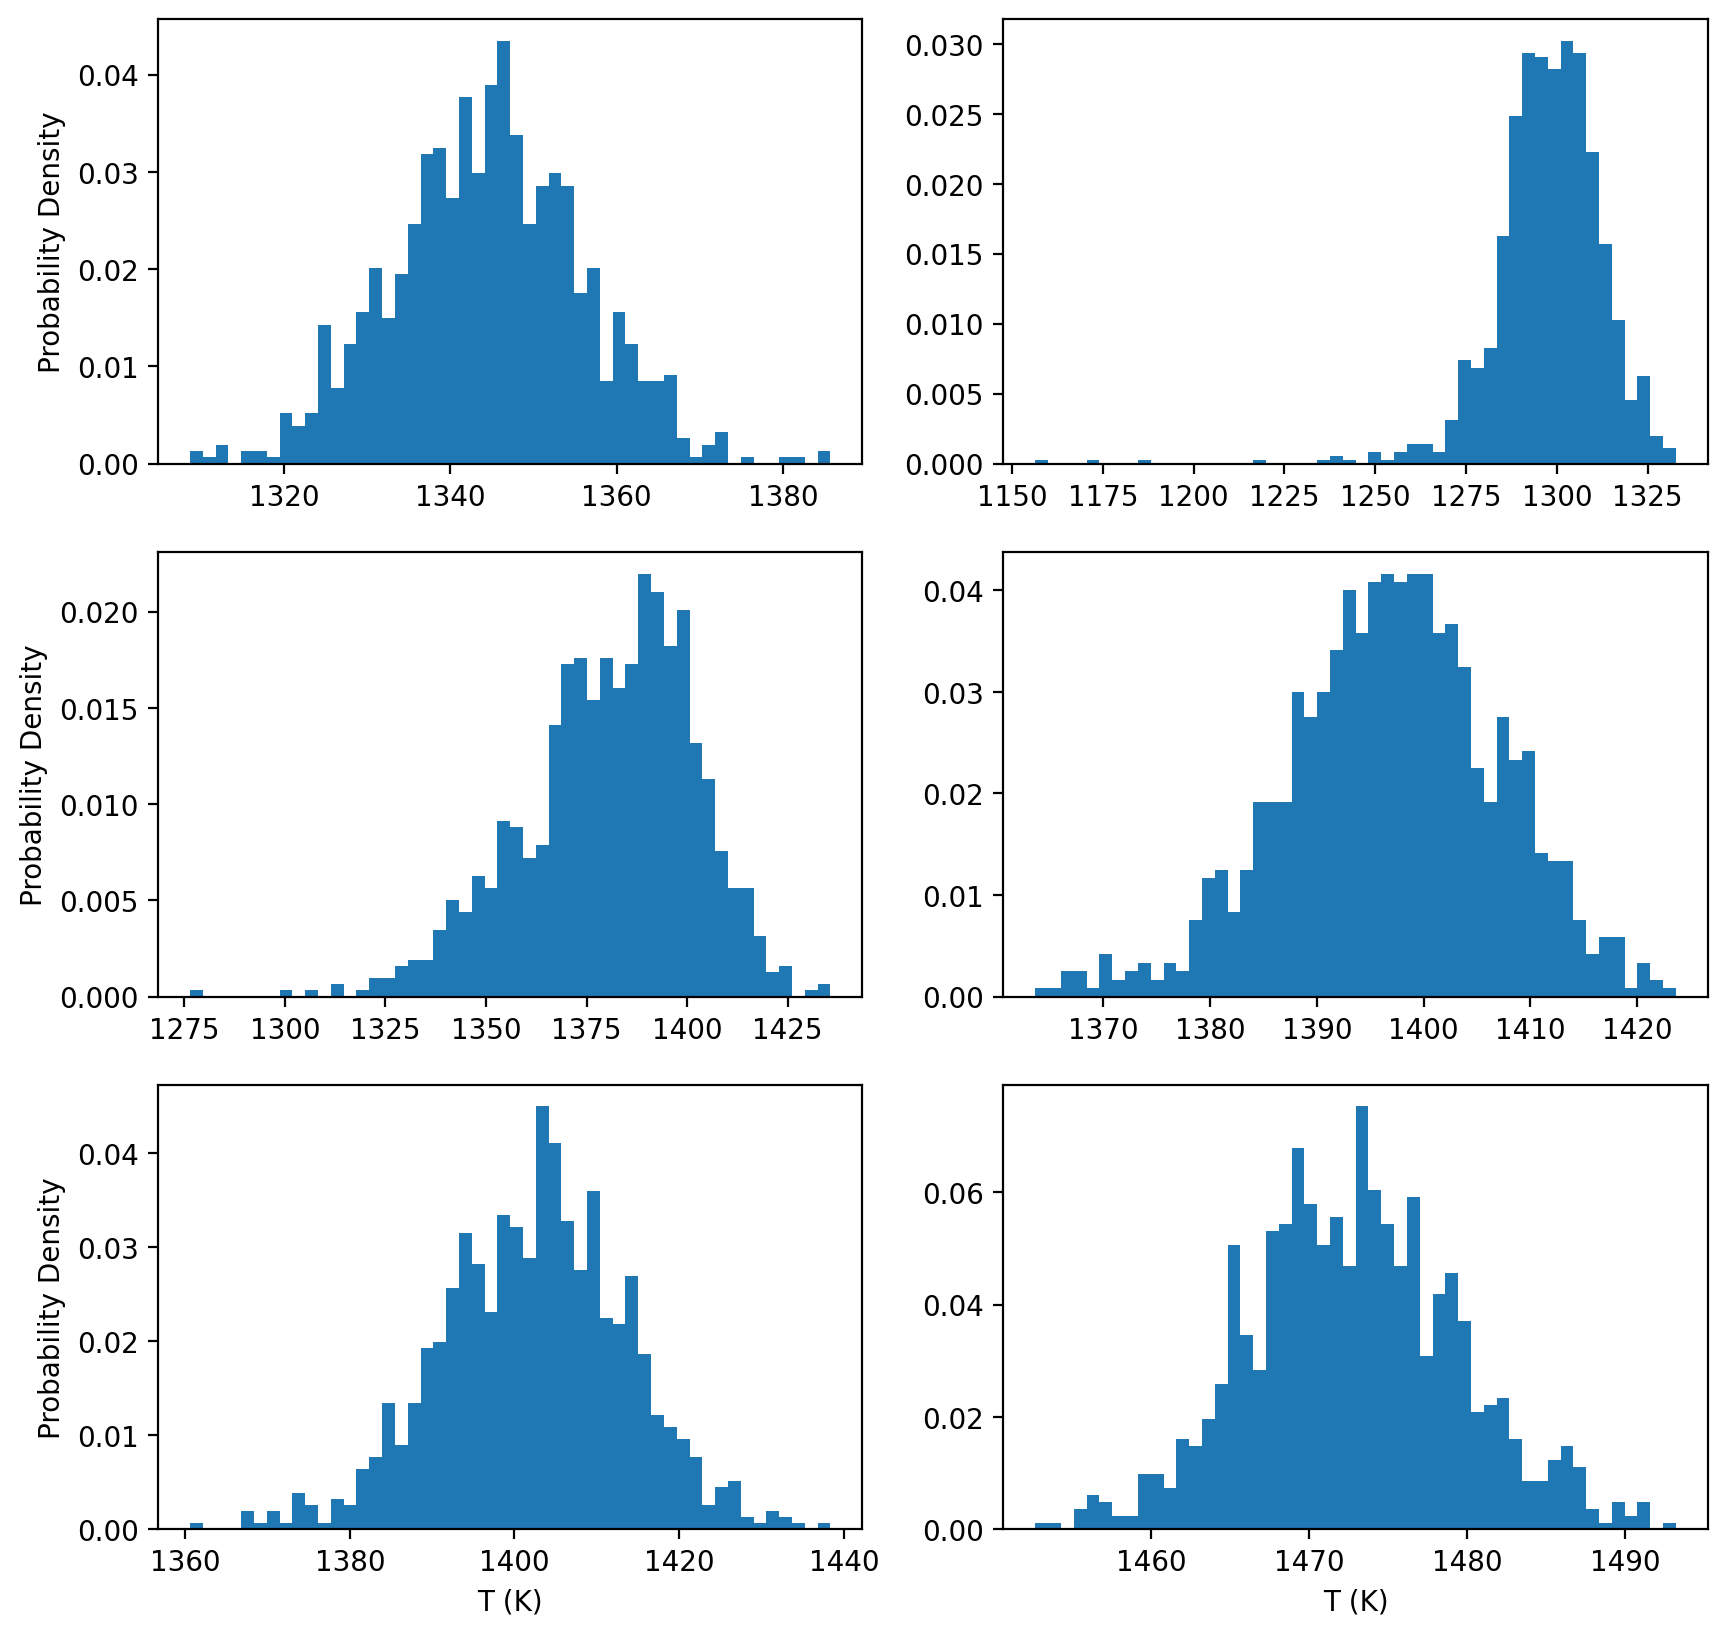

In [31]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 10))

ax1.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==0, "T_K_calc"], bins=50, density = True)
ax2.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==1, "T_K_calc"], bins=50, density = True)
ax3.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==2, "T_K_calc"], bins=50, density = True)
ax4.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==3, "T_K_calc"], bins=50, density = True)
ax5.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==4, "T_K_calc"], bins=50, density = True)
ax6.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==5, "T_K_calc"], bins=50, density = True)
ax6.set_xlabel('T (K)')
ax5.set_xlabel('T (K)')
ax1.set_ylabel('Probability Density')
ax3.set_ylabel('Probability Density')
ax5.set_ylabel('Probability Density')